# ABD Vizesi Tahmin Projesi
* Makine Öğrenimi Projesi Yaşam Döngüsü
	1.	Problemin Anlaşılması
	2.	Veri Toplama
	3.	Keşifsel Veri Analizi (EDA)
	4.	Veri Temizleme
	5.	Veri Ön İşleme
	6.	Model Eğitimi
	7.	En İyi Modelin Seçimi

# Hakkında

Amerika Birleşik Devletleri Göçmenlik ve Vatandaşlık Yasası (INA), yabancı işçilerin Amerika’ya geçici ya da kalıcı olarak çalışma izni almasına olanak tanır. Bu yasa, Amerika’daki işçileri iş yerinde olumsuz etkilerden korumayı ve yabancı işçilerin istihdam edilmesiyle ilgili gereklilikleri düzenler. Yabancı işçilerin Amerika’da çalışmasıyla ilgili göçmenlik programları, Yabancı Çalışan Sertifikası Ofisi (OFLC) tarafından yönetilmektedir.

* 1) Problem Tanımı

OFLC, yabancı işçileri Amerika Birleşik Devletleri’ne getirmek isteyen işverenler için iş sertifikası başvuruları alır ve bu başvurulara sertifika verir. Geçtiğimiz yıl başvuran kişi sayısı oldukça fazla olduğundan, OFLC, vize başvuru sahiplerini önceki verilere dayalı olarak sıralamak için makine öğrenimi modellerine ihtiyaç duymaktadır.
Bu projede, verilen veri setini kullanarak bir sınıflandırma modeli oluşturacağız.

Bu model, başvuru sahiplerinin vizesinin onaylanıp onaylanmayacağını tahmin edecektir.
Ayrıca, başvuru sahipleri için vize verilip verilmeyeceğini etkileyen belirli kriterlere dayalı olarak, vize onaylanacak veya reddedilecek başvurular için uygun profilleri öneren bir sistem kuracağız.

* 2) Veri Toplama

Veri, Yabancı Çalışan Sertifikası Ofisi (OFLC) tarafından sağlanmaktadır.
Veri seti, 25.480 satır ve 12 sütun içermektedir.
Bu veri setine şu linkten ulaşabilirsiniz: Kaggle Veri Seti

2.1 Veri ve Gerekli Paketlerin İçe Aktarılması

Projenin başlangıcında, veriyi ve gerekli kütüphaneleri içe aktaracağız. Pandas, Numpy, Matplotlib, Seaborn ve Warnings gibi kütüphaneleri kullanarak veri analizini gerçekleştireceğiz.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
df.shape

(25480, 12)

# Check Datatypes in the dataset 
(Veri setindeki veri türlerini kontrol edelim)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# EXPLORING DATA
(VERİ KEŞFİ)

In [8]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('Toplam {} sayısal özellik var: {}'.format(len(numeric_features), numeric_features))
print('\nToplam {} kategorik özellik var: {}'.format(len(categorical_features), categorical_features))

Toplam 3 sayısal özellik var: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Toplam 9 kategorik özellik var: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [9]:
# her kategorik sütunun değerlerinin dağılımını, her bir kategorinin toplam içindeki yüzdelik oranını hesaplayarak yazdırır.
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------------------')

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------------------

# İçgörüler
	•	case_id her sütun için benzersiz değerlere sahiptir, bu nedenle önemsiz olduğundan düşürülebilir.
	•	continent sütunu Asya’ya çok fazla eğilim göstermektedir. Bu yüzden diğer kategoriler birleştirilerek tek bir kategori oluşturulabilir.
	•	unit_of_wage önemli bir sütun gibi görünüyor çünkü çoğu yıllık sözleşmelerdir.

# Tek Değişkenli Analiz

Tek değişkenli analiz, bir değişkenin analizi anlamına gelir. “Uni” öneki “bir” anlamına gelir. Tek değişkenli analiz, tek bir değişkenin değerlerinin dağılımını anlamayı amaçlar.

Diğer Analiz Türleri:
	•	Çift Değişkenli Analiz: İki değişkenin analizi.
	•	Çok Değişkenli Analiz: İki veya daha fazla değişkenin analizi.

# Numerical Features

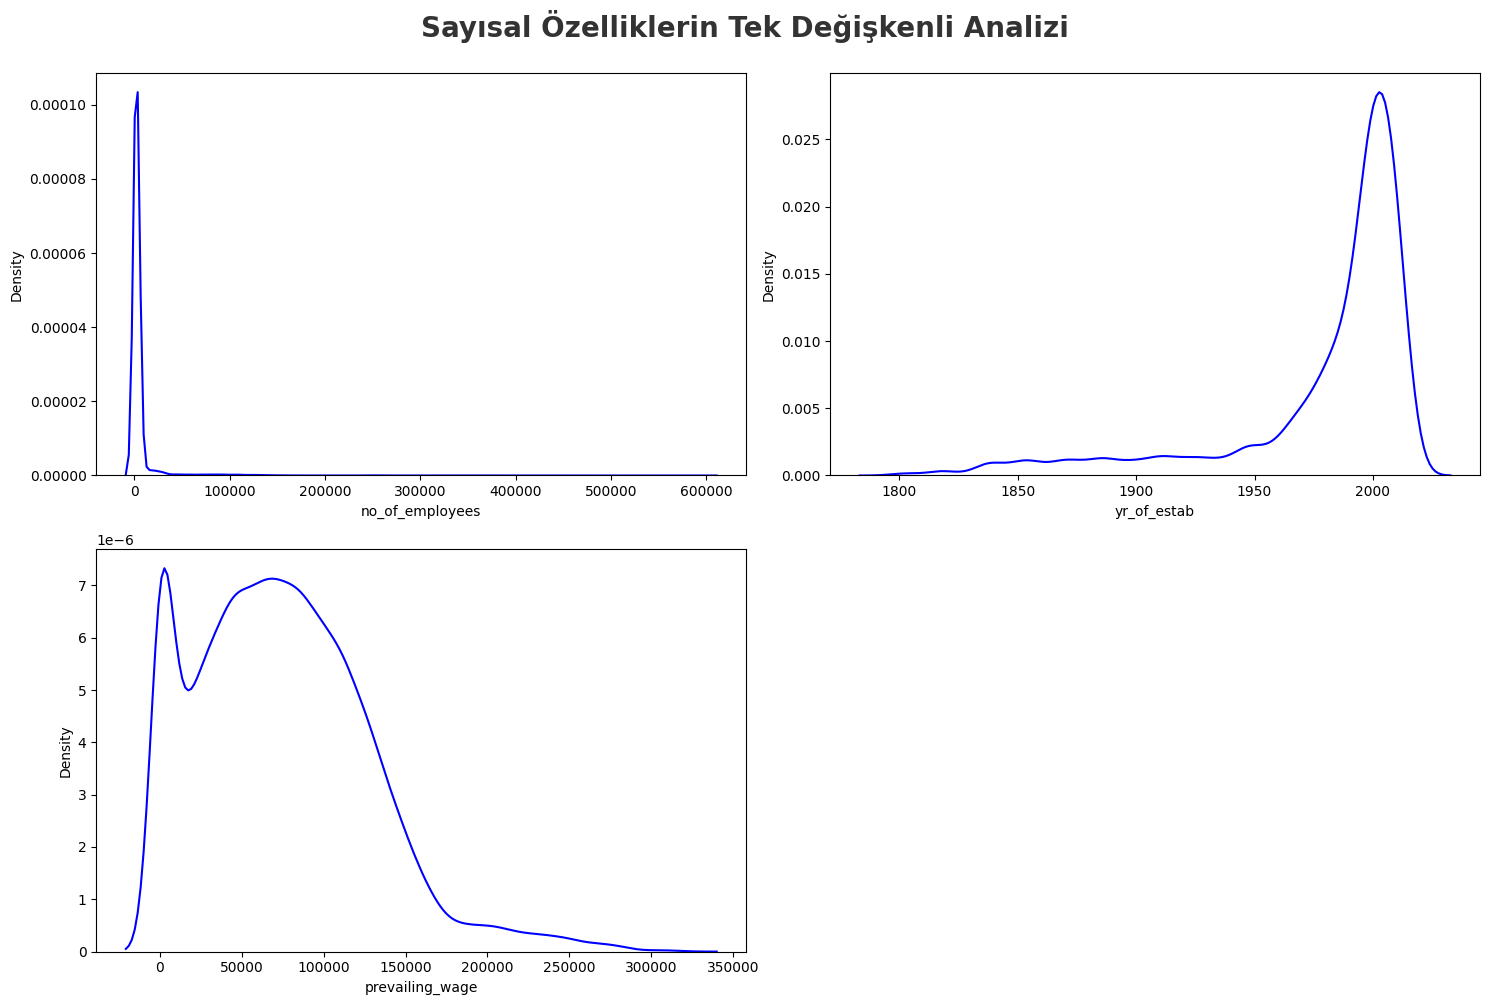

In [10]:
# Grafik boyutunu ayarlıyoruz
plt.figure(figsize=(15,10)) 

# Başlık ayarlarını yapıyoruz
plt.suptitle('Sayısal Özelliklerin Tek Değişkenli Analizi', fontsize=20, fontweight='bold', alpha=0.8, y=1) 

# Sayısal özellikler üzerinde döngü başlatıyoruz
for i in range (0, len(numeric_features)): 
    # Alt grafiklerde her bir özellik için ayrı grafik oluşturuyoruz
    plt.subplot(2, 2, i+1) 
    # KDE (Kernel Density Estimation) ile her bir sayısal özellik için dağılım grafiği çiziyoruz
    sns.kdeplot(x=df[numeric_features[i]], color='blue') 
    # Grafiğe x ekseni adı olarak sayısal özelliği ekliyoruz
    plt.xlabel(numeric_features[i]) 
    # Grafiğin düzeninin bozulmaması için tight_layout kullanıyoruz
    plt.tight_layout() 

* no_of_employees sütunu daha fazla çarpıklığa sahip gibi görünüyor, ancak bu durum aykırı değerlerden kaynaklanıyor olabilir.
	* yr_of_estab (kuruluş yılı) bir ayrık özelliktir.
	* privailing-wage (geçerli ücret) sağa çarpık bir dağılıma sahiptir.

# Categorical Features

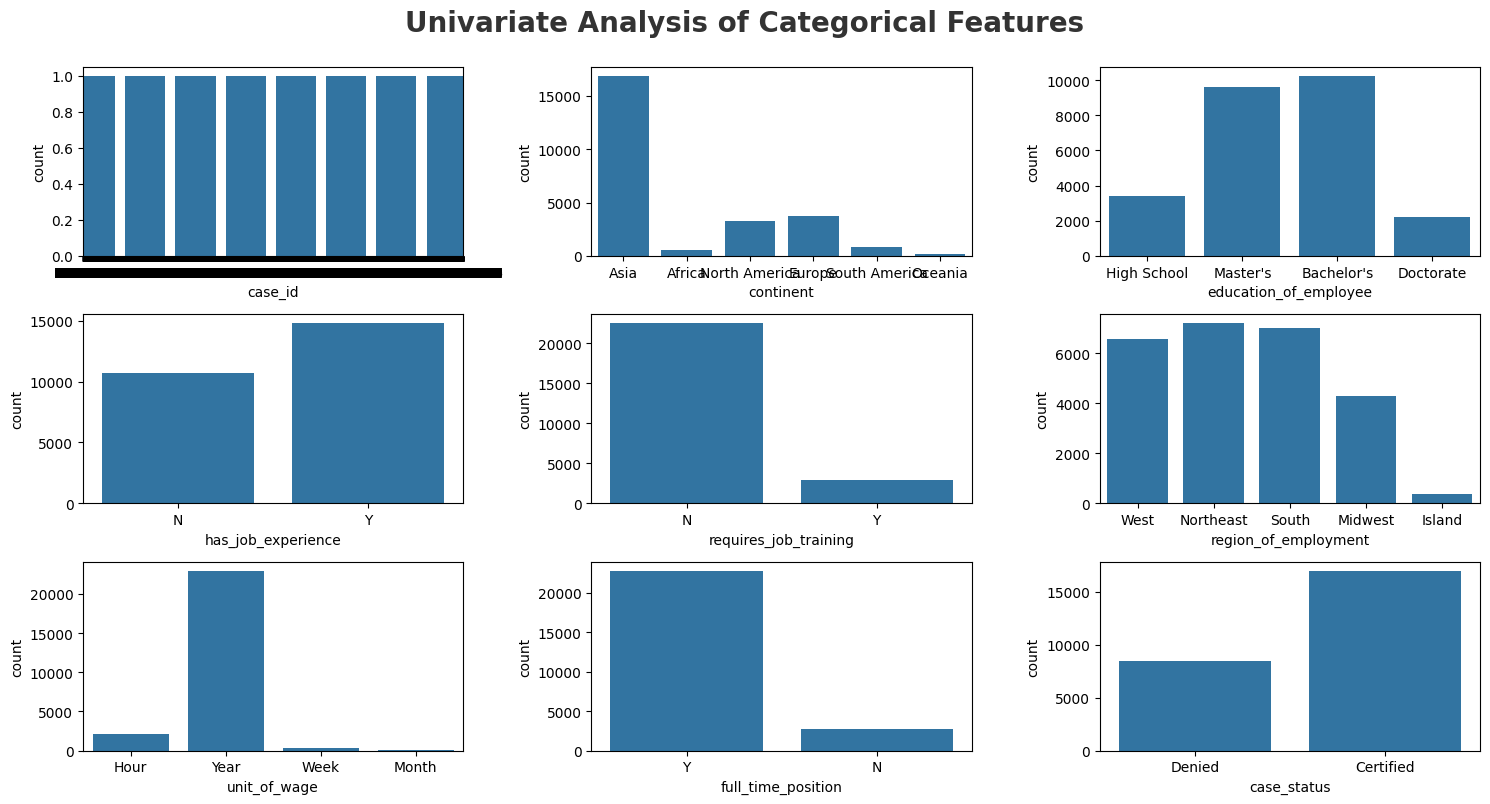

In [11]:

plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

## İçgörüler
	•	requires_job_training, unit_of_wage, full_time_position ve continent sütunlarında tek bir kategori baskın.
	•	Diğer sütunlar dengeli bir dağılıma sahip.

## Çok Değişkenli Analiz

Çok değişkenli analiz, birden fazla değişkenin analizidir.

In [12]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>25]

print('Toplam {} kesikli özellik bulunmaktadır: {}'.format(len(discrete_features), discrete_features))
print('\nToplam {} sürekli özellik bulunmaktadır: {}'.format(len(continuous_features), continuous_features))

Toplam 0 kesikli özellik bulunmaktadır: []

Toplam 3 sürekli özellik bulunmaktadır: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


# Sayısal özelliklerde çoklu doğrusal bağlantıyı kontrol etmek

In [13]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Görüşler
	•	Hiçbir değişken arasında çoklu doğrusal ilişki (multicollinearity) yoktur.

Kategorik Özellikler için Çoklu Doğrusal İlişkiyi Kontrol Etme
	•	Ki-kare testi (çift-kare ya da χ2 testi olarak da bilinir), test istatistiği null hipotez altında ki-kare dağılımına uygun olduğunda geçerli olan bir istatistiksel hipotez testidir. Özellikle Pearson’un ki-kare testi ile yapılır.

	•	Ki-kare istatistiği, iki kategorik değişken arasındaki ilişkiyi göstermek için bir yöntemdir.
	
	•	Burada, kategorik sütunların hedef sütun (yani case_status) ile olan ilişkisini test ediyoruz.

## Null Hipotez (H0):
	•	Özellik, hedef sütun ile bağımsızdır (Korelasyon Yoktur).

## Alternatif Hipotez (H1):
	•	Özellik ve hedef sütun bağımsız değildir (Korelasyon Vardır).
    

In [14]:
from scipy.stats import chi2_contingency

# Ki-kare testi sonuçlarını saklamak için bir liste oluşturuyoruz
chi2_test = []

# Kategorik özellikler üzerinde döngü başlatıyoruz
for feature in categorical_features:
    # Her bir kategorik özellik için ki-kare testi uyguluyoruz
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Null Hipotezini Reddet')
    else:
        chi2_test.append('Null Hipotezini Kabul ediyoruz')

# Sonuçları bir DataFrame'e dönüştürüp, sütun isimlerini belirliyoruz
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Sütun', 'Hipotez Sonucu']

# Sonuçları yazdırıyoruz
result


#Bu kod, case_status (hedef sütun) ile her bir kategorik özellik arasındaki ilişkiyi test etmek için Ki-kare testini (χ2 testi) kullanır.
	#•	Eğer p-değeri (test istatistiği) 0.05’ten küçükse, null hipotez reddedilir ve bu özellik ile hedef sütun arasında anlamlı bir ilişki olduğu kabul edilir.
	#•	Eğer p-değeri 0.05’ten büyükse, null hipotezi reddedilemez ve bu özellik ile hedef sütun arasında ilişki olmadığı kabul edilir.

#Sonuçlar, her kategorik sütun ve hipotez sonucu ile birlikte bir DataFrame olarak gösterilir.

,Sütun,Hipotez Sonucu
0,case_id,Null Hipotezini Kabul ediyoruz
1,continent,Null Hipotezini Reddet
2,education_of_employee,Null Hipotezini Reddet
3,has_job_experience,Null Hipotezini Reddet
4,requires_job_training,Null Hipotezini Kabul ediyoruz
5,region_of_employment,Null Hipotezini Reddet
6,unit_of_wage,Null Hipotezini Reddet
7,full_time_position,Null Hipotezini Reddet
8,case_status,Null Hipotezini Reddet


Rapor

Burada requires_job_training null hipotezini reddedememektedir, bu da hedef sütun ile korelasyonu olmadığı anlamına gelir.

# Null değerlerini kontrol etme

In [15]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [16]:
continues_features = [feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Sürekli özellik sayısı: ', continuous_features)

Sürekli özellik sayısı:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


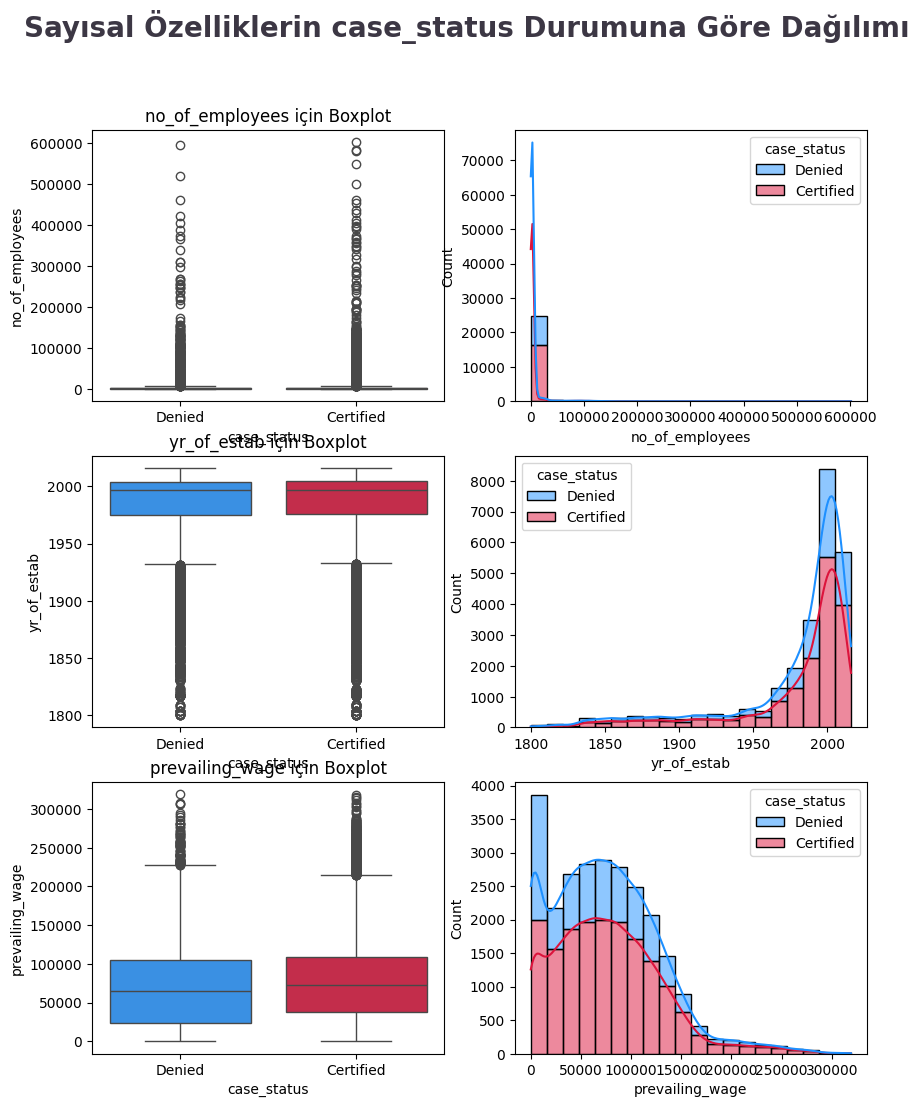

In [17]:
# Kullanılacak renk paletini tanımlıyoruz
clr1 = ['#1E90FF', '#DC143C']  # Mavi ve kırmızı renkleri

# 3x2'lik bir grafik düzeni oluşturuyoruz ve figür başlığını ayarlıyoruz
fig, ax = plt.subplots(3, 2, figsize=(10, 12))  # 3 satır ve 2 sütundan oluşan alt grafik düzeni
fig.suptitle('Sayısal Özelliklerin case_status Durumuna Göre Dağılımı', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')  # Başlık ekliyoruz

# continue_features'deki her bir özellik için döngü başlatıyoruz
for i, col in enumerate(continues_features):
    # Boxplot: Her bir sayısal özellik için, 'case_status' tarafından bölünmüş boxplot oluşturuyoruz
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'{col} için Boxplot', fontsize=12)  # Her boxplot için başlık ekliyoruz

    # Histogram: 'case_status' ile ayrılmış ve KDE (Kernel Density Estimation) eklenmiş histogram
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    # KDE: Kernel Density Estimation eğrisini ekliyoruz

* İlk Analiz Raporu
    *	Çalışan Sayısı (no_of_employees) sütununda birçok aykırı değer (outlier) bulunmaktadır. Bu aykırı değerler, Özellik Mühendisliği (Feature Engineering) aşamasında ele alınabilir. Ayrıca, bu sütunun dağılımı sağa çarpık (Right Skewed) bir yapıya sahiptir.
	*	Kuruluş Yılı (yr_of_estab) sütunu sola çarpık (Left Skewed) bir dağılıma sahiptir ve box plot’un alt sınırının altında kalan bazı aykırı değerler bulunmaktadır.
	*	Geçerli Ücret (prevailing_wage) sütunu sağa çarpık (Right Skewed) bir dağılıma sahiptir ve box plot’un üst sınırının üzerinde aykırı değerler mevcuttur.
	*	Veri setinde eksik değer bulunmamaktadır.
	*	case_id sütunu her satır için benzersiz değerlere sahiptir, bu yüzden silinebilir.
	*	case_status sütunu tahmin edilmesi gereken hedef değişkendir.
	*	Kategorik sütunlar içinde bulunan bazı özellikler, İkili (Binary) sayısal değerlere dönüştürülerek özellik kodlaması (Feature Encoding) yapılabilir.

# 4.	Görselleştirme
# 4.1 Hedef Özelliğin Görselleştirilmesi

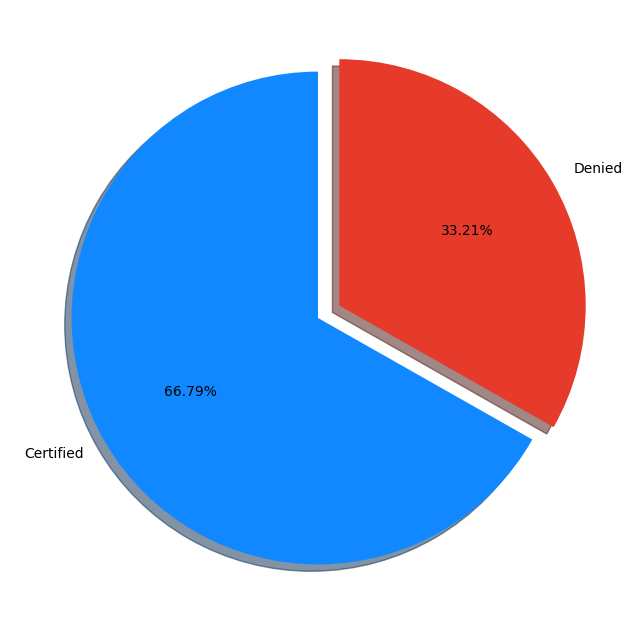

In [18]:
import matplotlib.pyplot as plt

# 1️⃣ Kategorik Verinin Yüzdelik Dağılımını Hesaplama
percentage = df.case_status.value_counts(normalize=True) * 100  # case_status sütunundaki her değerin yüzdesini hesaplar

# 2️⃣ Pasta Grafiği İçin Etiketlerin Belirlenmesi
labels = ["Certified", "Denied"]  # Grafikteki dilimlere verilecek isimler

# 3️⃣ Grafik Boyutunun Ayarlanması
fig, ax = plt.subplots(figsize=(15, 8))  # Grafik boyutunu 15x8 inç olarak ayarlar

# 4️⃣ Pasta Grafiği İçin Dilim Patlatma Ayarı
explode = (0, 0.1)  # Certified dilimi sabit, Denied dilimi %10 dışarı taşırılmış olacak

# 5️⃣ Renklerin Tanımlanması
colors = ['#1188ff', '#e63a2a']  # Certified için mavi, Denied için kırmızı renk belirleniyor

# 6️⃣ Pasta Grafiğinin Çizilmesi
ax.pie(percentage,  # Pasta grafiğinin dilim oranlarını belirler
       labels=labels,  # Dilimlere etiket ekler
       startangle=90,  # Grafiği 90 derece döndürerek başlatır
       autopct='%1.2f%%',  # Her dilime yüzdelik değer ekler (örneğin: %78.32)
       explode=explode,  # Denied dilimini dışarı doğru taşırır
       shadow=True,  # 3D gölge efekti ekler
       colors=colors)  # Önceden tanımlanan renkleri uygular

# 7️⃣ Grafiğin Gösterilmesi
plt.show()  # Grafiği ekrana çizer

Grafikten, Hedef Değişkeninin Dengesiz Olduğu Görülmektedir. Dengesiz Veri Nedir?

Dengesiz veriler, hedef sınıfın gözlemlerinin dengesiz bir dağılıma sahip olduğu veri türleridir. Yani burada, “Denied” değeri, “Certified” değerine göre daha fazla sayıya sahiptir.

# 4.2 Başvuru Sahibi Kıtası, Vize Durumu Üzerinde Bir Etkiye Sahip Mi?

In [19]:
# Bu kod, her kıta (continent) için case_status değerlerinin yüzdesini hesaplar ve bir DataFrame olarak döndürür.
# kıtaların vize durumlarına etkisi varmı yokmu
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

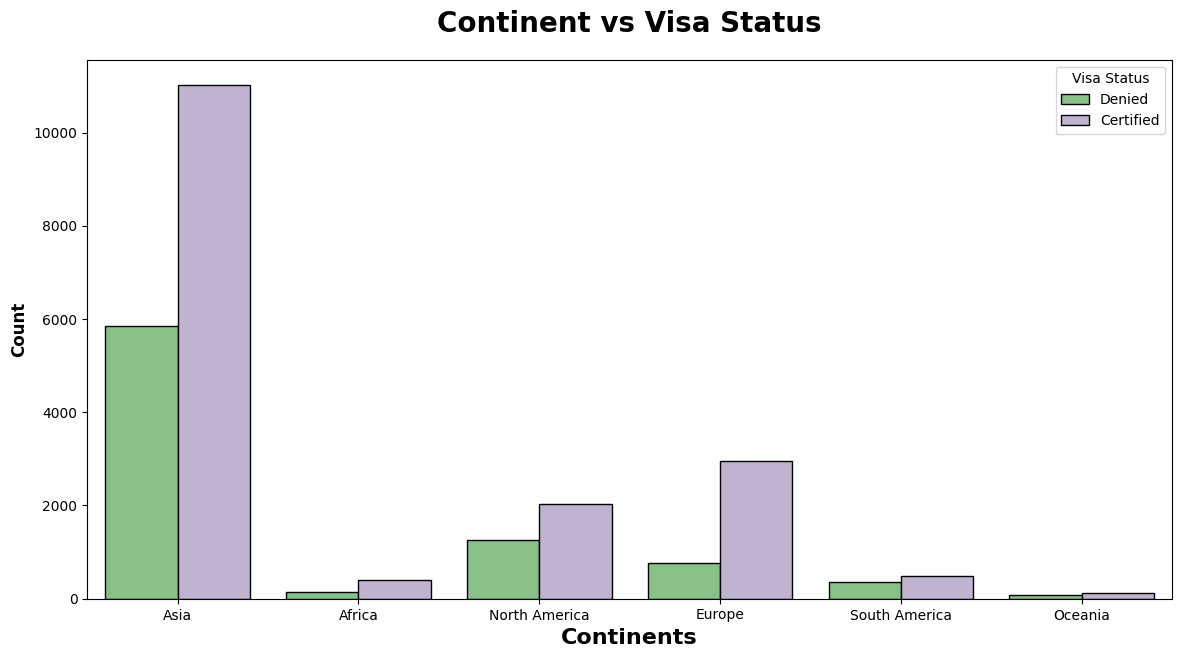

In [20]:
# Grafik oluşturmak için Matplotlib'in figür ve eksen nesnesini ayarlar
plt.subplots(figsize=(14,7))  

# Seaborn kullanarak kıtalara göre vize durumlarını gösteren bir çubuk grafik oluşturur
sns.countplot(
    x="continent",         # X ekseni: Kıtalar
    hue="case_status",     # Renk gruplaması: Vize Durumu (Certified/Denied)
    data=df,               # Veri kaynağı: df DataFrame'i
    ec="black",            # Çubukların kenarlık rengini siyah yapar
    palette="Accent"       # Renk paletini belirler
)  

# Grafiğe başlık ekler
plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)  

# Y ekseni etiketini ekler
plt.ylabel("Count", weight="bold", fontsize=12)  

# X ekseni etiketini ekler
plt.xlabel("Continents", weight="bold", fontsize=16)  

# Grafikteki legend (açıklamalar) ayarlarını yapar
plt.legend(title="Visa Status", fancybox=True)  

# Grafiği ekrana getirir
plt.show()  

In [21]:
df2 = df.copy()

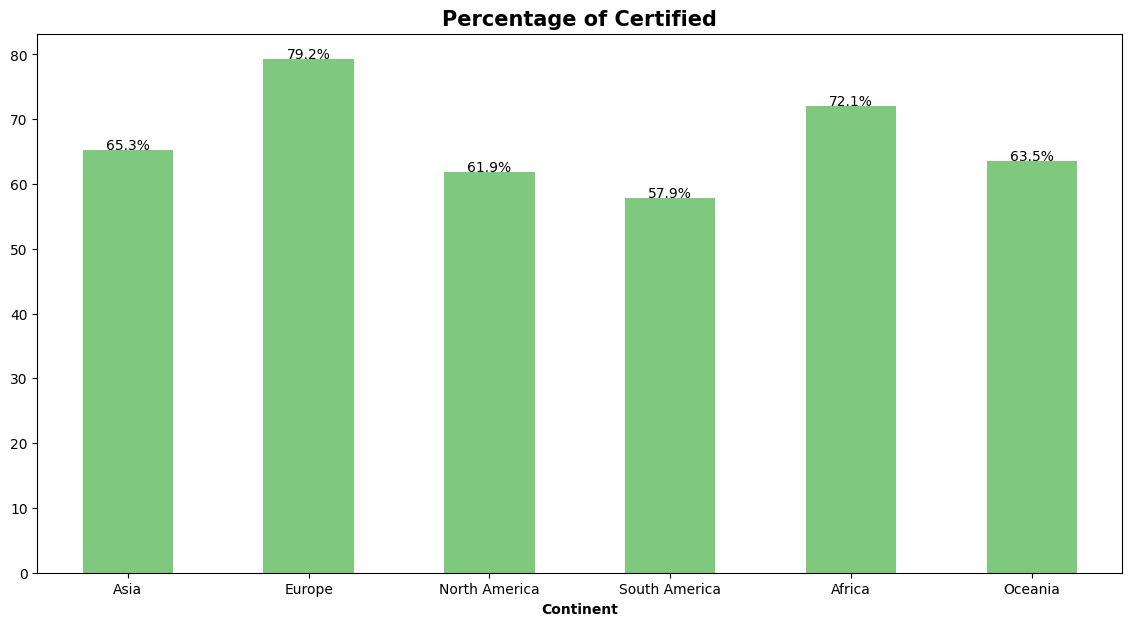

In [22]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Rapor:

Grafiğe göre, Asya’dan başvuranlar diğer kıtalara göre daha fazla başvuruda bulunmuş.

Onaylanan başvuruların %43’ü Asya’dan.

Bunu %11 ile Avrupa takip ediyor.

En yüksek onay alma şansı Avrupa’dan başvuranların ve ardından Afrika’dan başvuranların.

## 4.3 Başvuranın Eğitim Durumu ve Vize Durumu Üzerindeki Etkisi

In [23]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

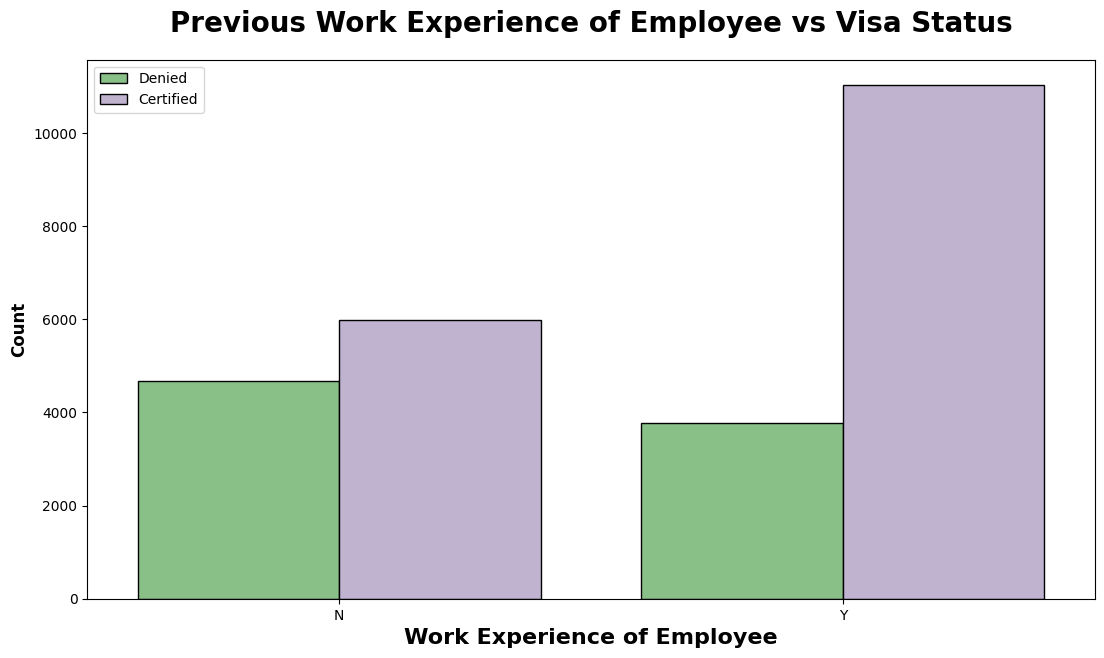

In [24]:
plt.subplots(figsize=(13,7))
sns.countplot(x='has_job_experience', hue='case_status', data=df, ec='black', palette='Accent')
plt.title('Previous Work Experience of Employee vs Visa Status', weight='bold', fontsize=20, pad=20)
plt.ylabel("Count", weight='bold', fontsize=12)
plt.xlabel("Work Experience of Employee", weight='bold', fontsize=16)
plt.legend()
plt.show()

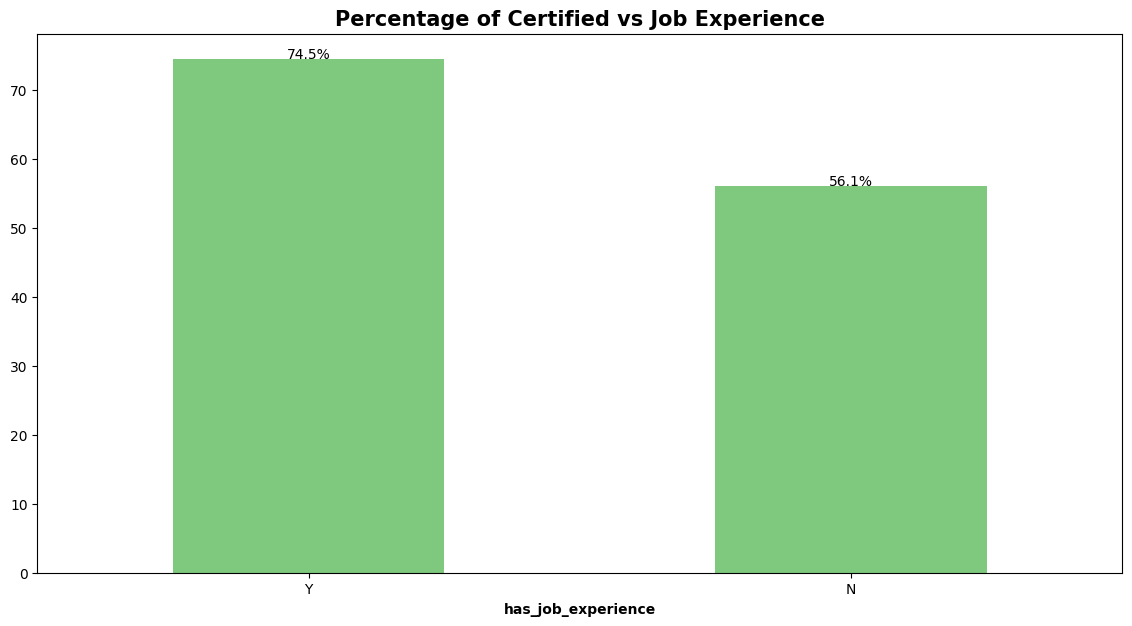

In [25]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

* Rapor

* Önceki iş deneyimi olan kişiler, yalnızca %74.5 oranında onay almış ve %25.5’i reddedilmiştir.
* Önceki iş deneyimi olmayan kişiler ise %56 oranında onay almış ve %44’ü reddedilmiştir.
* Bu, iş deneyiminin vize durumunu etkilediğini göstermektedir.
* İş deneyimi olan kişilerin, deneyimsizlere göre biraz daha avantajlı olduğu söylenebilir, ancak fark çok büyük değildir.

# 4.5 Çalışanın iş eğitimi alması, vize durumu üzerinde herhangi bir etki yaratıyor mu?

In [26]:
# “iş eğitimi gereksinimi”ne göre gruplama yaparak, her bir grup için vize durumu (case_status) değerlerinin yüzde dağılımını hesaplar ve bu verileri bir veri çerçevesi olarak döndürür.
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

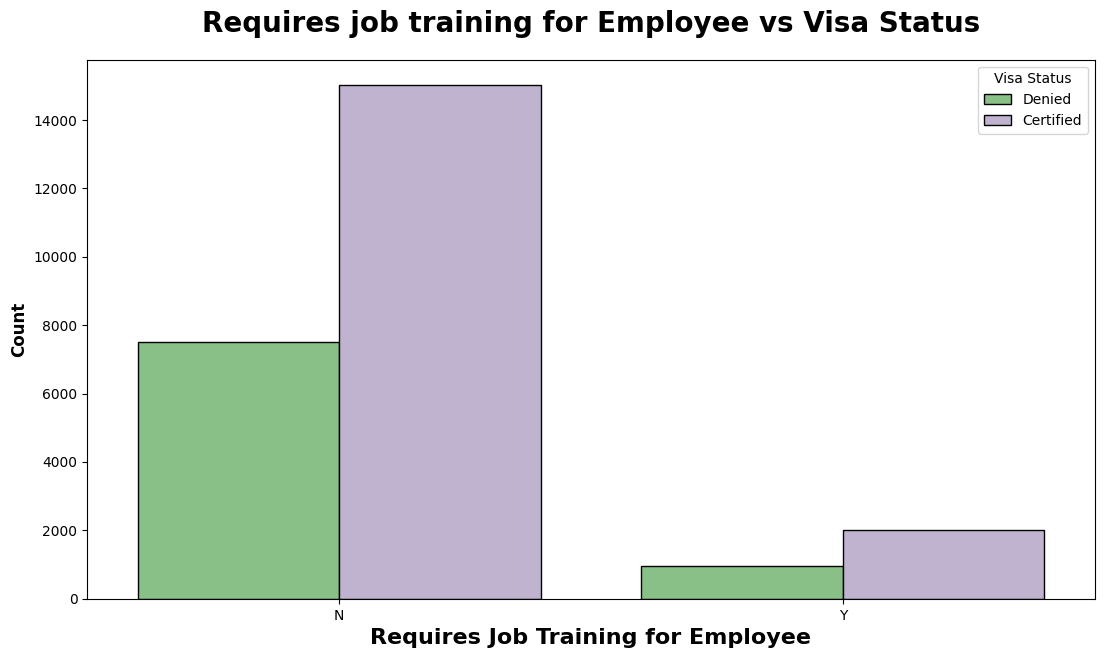

In [27]:
plt.subplots(figsize=(13,7))
sns.countplot(x='requires_job_training', hue='case_status', data=df, ec='black', palette='Accent')
plt.title('Requires job training for Employee vs Visa Status', weight='bold', fontsize=20, pad=20)
plt.ylabel('Count', weight='bold', fontsize=12)
plt.xlabel('Requires Job Training for Employee', weight='bold',fontsize=16)
plt.legend(title='Visa Status',fancybox=True)
plt.show()

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

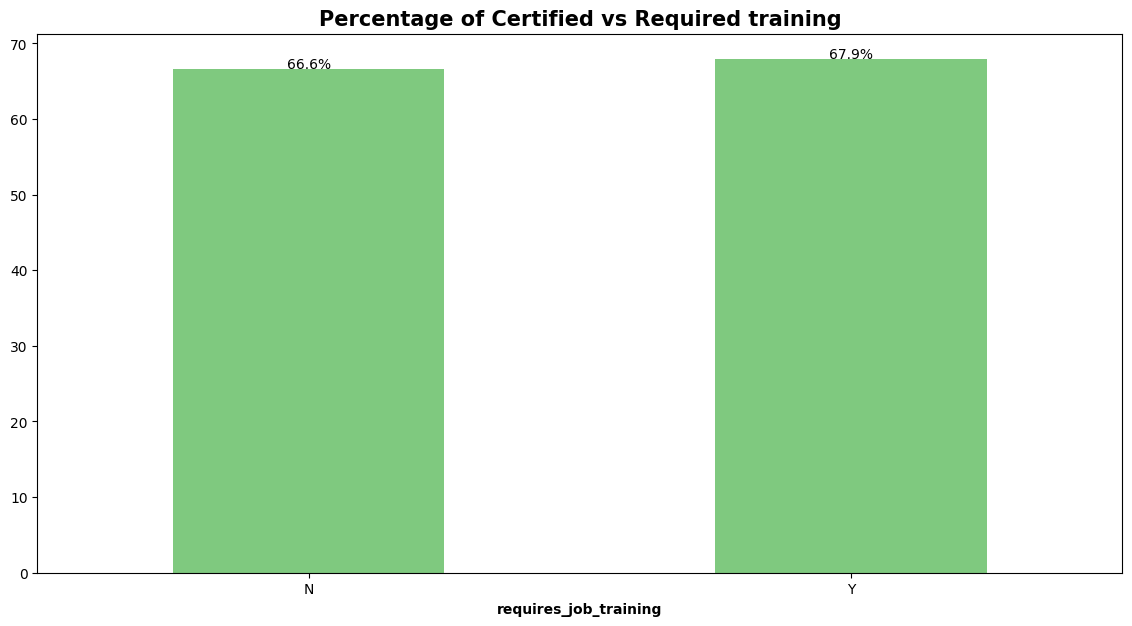

In [28]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)

Rapor

* Eğer çalışan iş eğitimi gerektiriyorsa ve bunun vize durumu üzerinde herhangi bir etkisi yoksa:
	*	Başvuru yapanların %88’i iş eğitimi gerektirmez.
	*	İş eğitimi istemeyen kişilerin %66’ü onay aldı.
	*	İş eğitimi gerektiren çalışanların %67’si onay aldı.
	*	Chi-Kare testiyle incelediğimizde, bu özelliğin hedef değişken üzerinde büyük bir etkisi olmadığı sonucuna varıldı, bu da yukarıdaki grafikle doğrulandı.

# 4.6 İşverenin çalışan sayısının vize durumu üzerinde herhangi bir etkisi var mı?

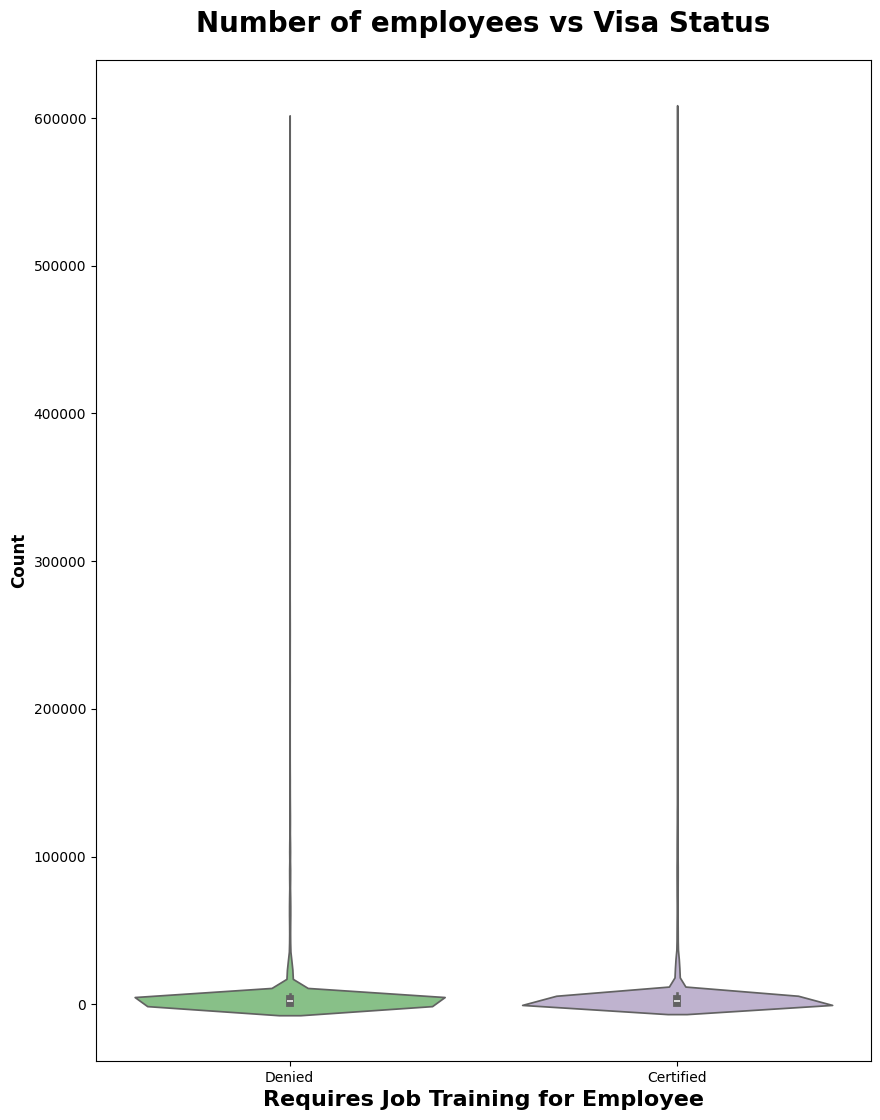

In [29]:
plt.subplots(figsize=(10,13))
sns.violinplot(x='case_status', y='no_of_employees', data=df, palette='Accent')
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

* İçgörüler

* Her iki dağılım da benzer. Ancak, her iki sınıfta da ele alınması gereken uç değerler (outliers) bulunmaktadır.

# 4.7 Maaş Birimleri ve Vize Durumu Üzerindeki Etkisi

In [30]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

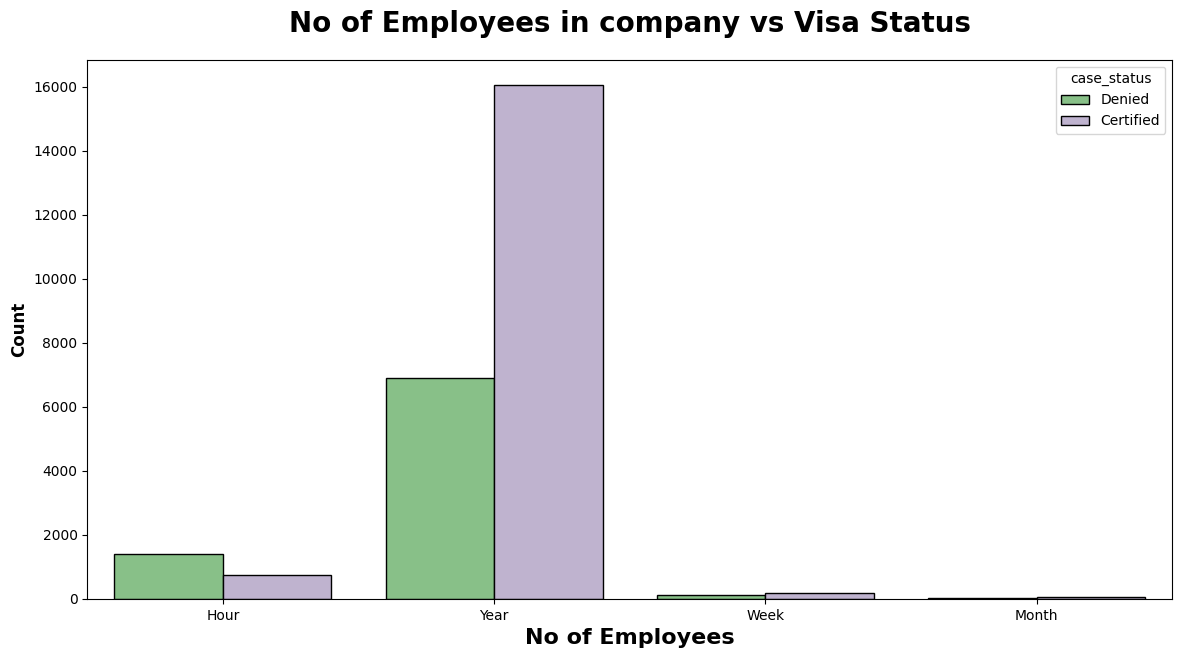

In [31]:
plt.figure(figsize=(14,7))
sns.countplot(x='unit_of_wage', hue='case_status', data=df, ec='k', palette='Accent')
plt.title('No of Employees in company vs Visa Status', weight='bold', fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Year'),
  Text(1, 0, 'Hour'),
  Text(2, 0, 'Week'),
  Text(3, 0, 'Month')])

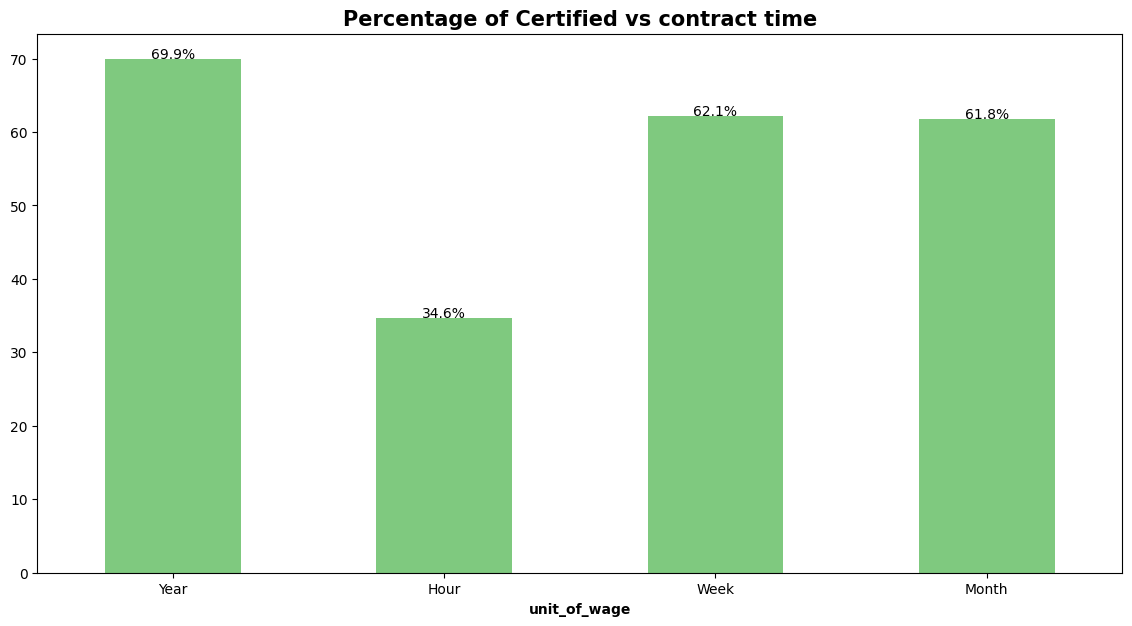

In [32]:

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)

* Rapor

* Saatlik ödeme başvurusu yapan çalışanların %65’i reddedildi.
* Yıllık maaş birimi başvurularının %69’u kabul edilirken, %31’i reddedildi.
* Yıllık sözleşme başvurularının diğerlerinden daha yüksek bir kabul oranına sahip olduğu görülmektedir, bunu hemen ardından haftalık ve aylık sözleşmeler takip etmektedir.


# 4.7 Bölge, vize durumu üzerinde etkili midir?

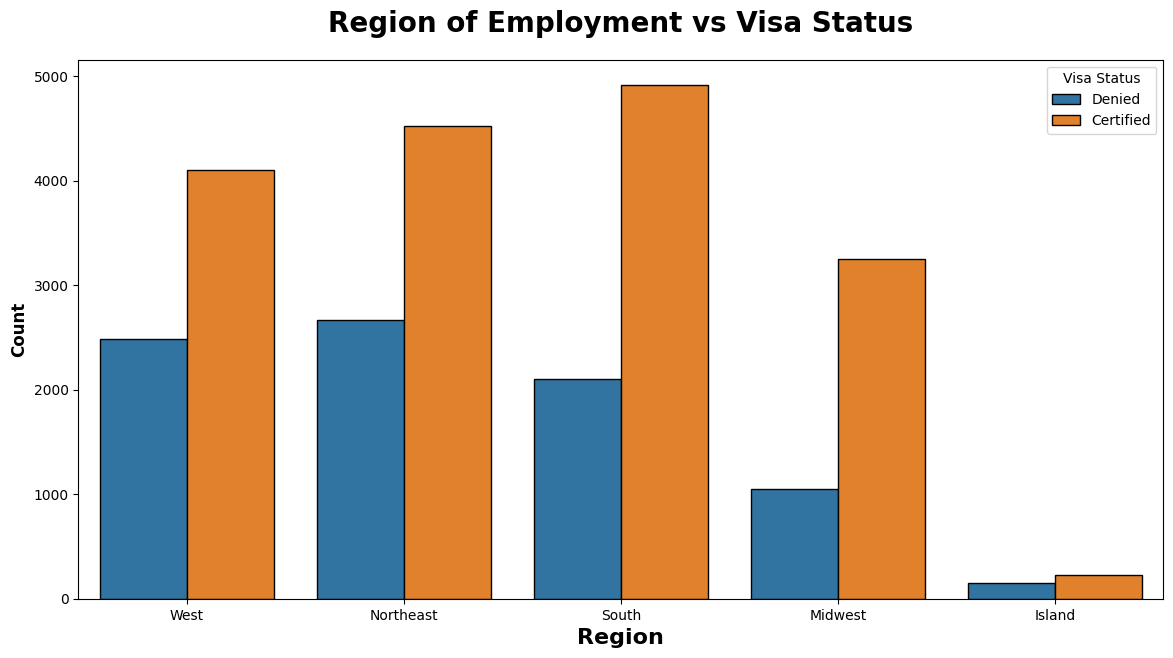

In [33]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment", hue="case_status", data=df, ec='k')
plt.title("Region of Employment vs Visa Status", weight='bold', fontsize=20, pad=20)
plt.xlabel("Region",weight='bold',fontsize=16)
plt.ylabel("Count", weight='bold', fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

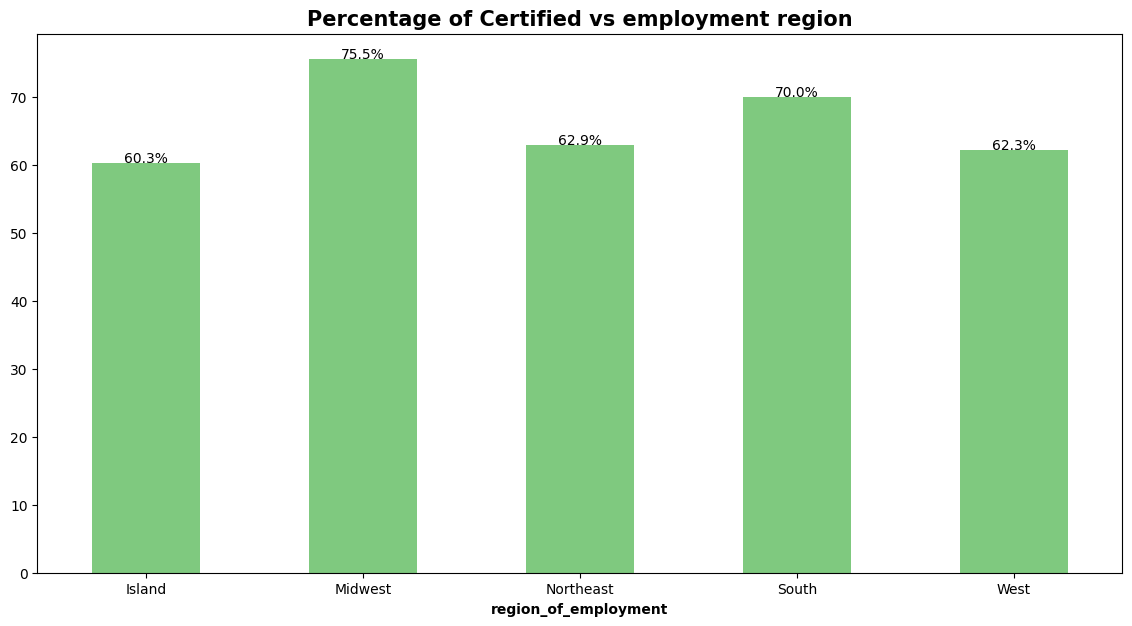

In [34]:

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Rapor

Grafiğe göre, tüm bölgelerde vize başvurularının kabul edilme ve reddedilme oranları oldukça benzer bir desen gösteriyor. Ancak, Midwest bölgesinde biraz daha fazla kabul edilen başvuru varken, bunu South bölgesi takip ediyor.

# 4.8 Geçerli ücret (Prevailing wage) vize durumu üzerinde herhangi bir etkiye sahip midir?

In [36]:
df.groupby('prevailing_wage')['case_status'].value_counts(normalize=True)

prevailing_wage  case_status
2.1367           Certified      1.0
2.9561           Denied         1.0
3.0031           Denied         1.0
3.3188           Denied         1.0
3.4889           Certified      1.0
                               ... 
311734.4900      Certified      1.0
314156.0600      Certified      1.0
315497.6000      Certified      1.0
318446.0500      Certified      1.0
319210.2700      Denied         1.0
Name: proportion, Length: 25462, dtype: float64

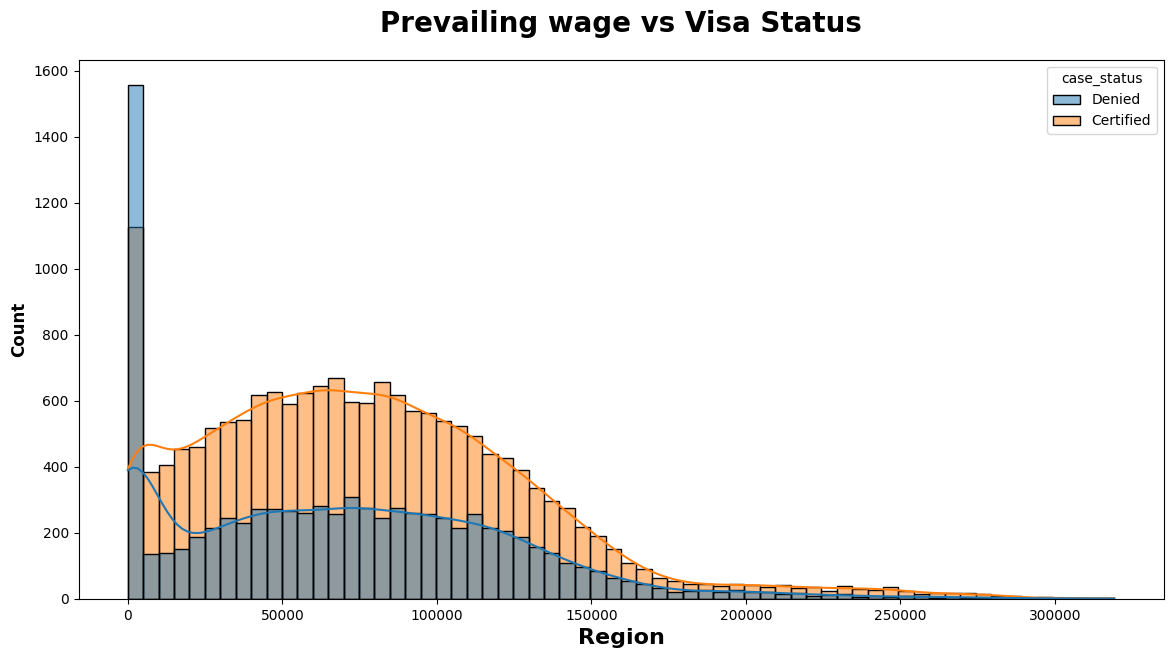

In [37]:

plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()


* İçgörüler

* Her iki sınıfın dağılımı aynıdır, ancak aykırı değerlerin (outliers) ele alınması gerekmektedir.

# 4.8.1 Eğitim Durumuna Göre Prevailing Wage (Geçerli Ücret)

In [38]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


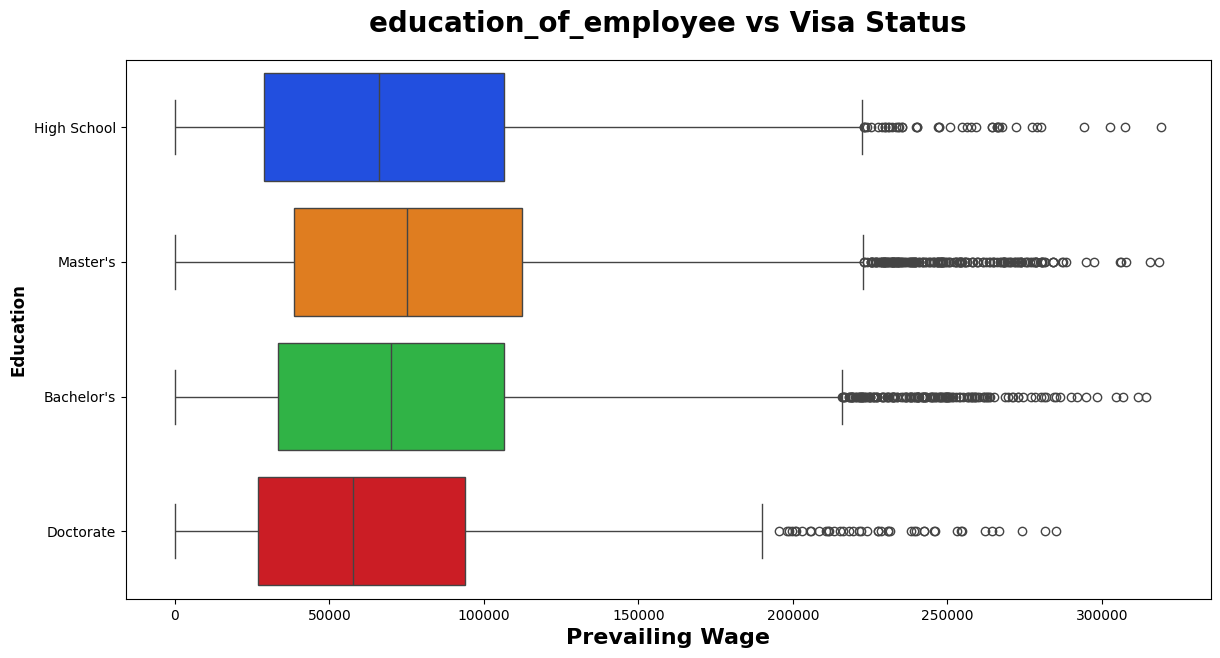

In [39]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

* Rapor
    * Yukarıdaki tablo ve grafiklere göre, yüksek lisans (Master’s) eğitimi olan başvuru sahiplerinin daha yüksek ortalama geçerli ücretlere sahip olduğu görülmektedir. Yüksek lisans eğitimi olan başvuru sahiplerinin medyan maaşı $78.8k olup, bu maaş, doktora (Doctorate) ortalama maaşından yaklaşık olarak %20 daha yüksektir ki bu durum oldukça şaşırtıcıdır.



# 4.8.2 Prevailing Wage Based on Job Experience (İş Deneyimine Göre Geçerli Ücret)

In [40]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


* Rapor
    * Şaşırtıcı bir şekilde, daha az iş deneyimi olan kişilerin daha yüksek geçerli ücretleri bulunmaktadır. Hiç iş deneyimi olmayan başvuru sahiplerinin medyan geçerli ücreti 72.000 USD iken, önceki iş deneyimi olan başvuru sahiplerinin medyan geçerli ücreti ise 69.000 USD’dir.

# 4.8.3 Prevailing Wage Based on Continent (Kıta Bazında Geçerli Ücret)

In [41]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


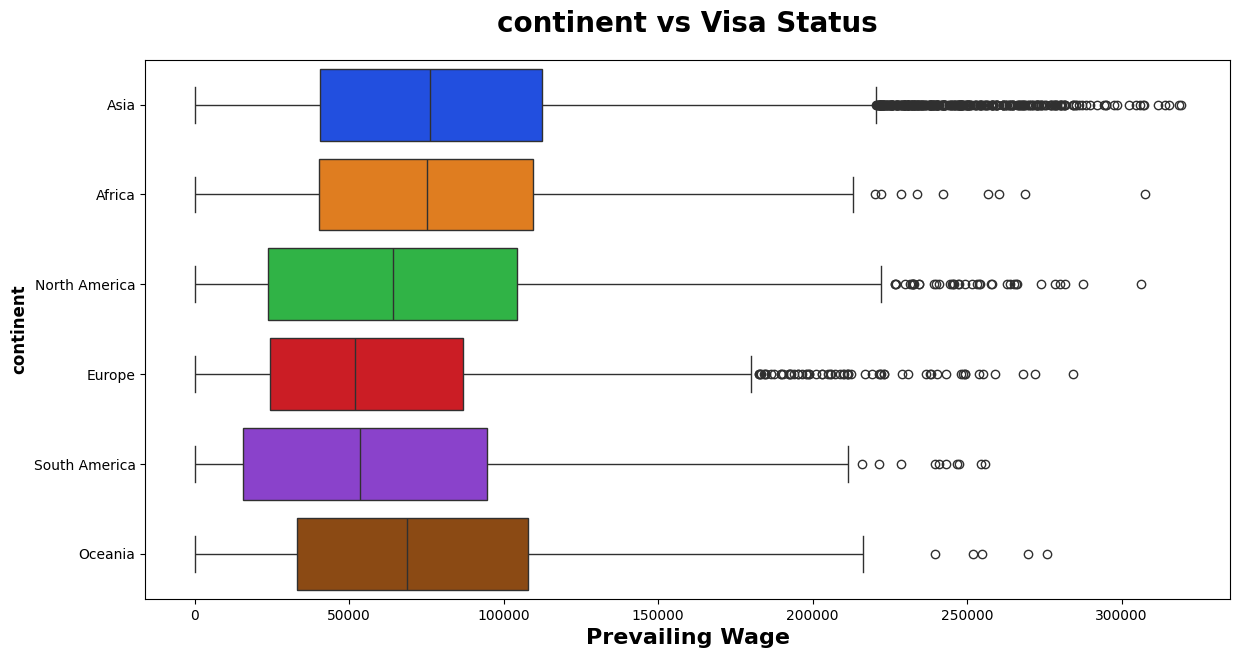

In [42]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show();

* Rapor

   * Asya’dan gelen kişilerin ortalama maaşı, diğer kıtalara göre daha yüksektir.

# 4.9 Kuruluş Yılı

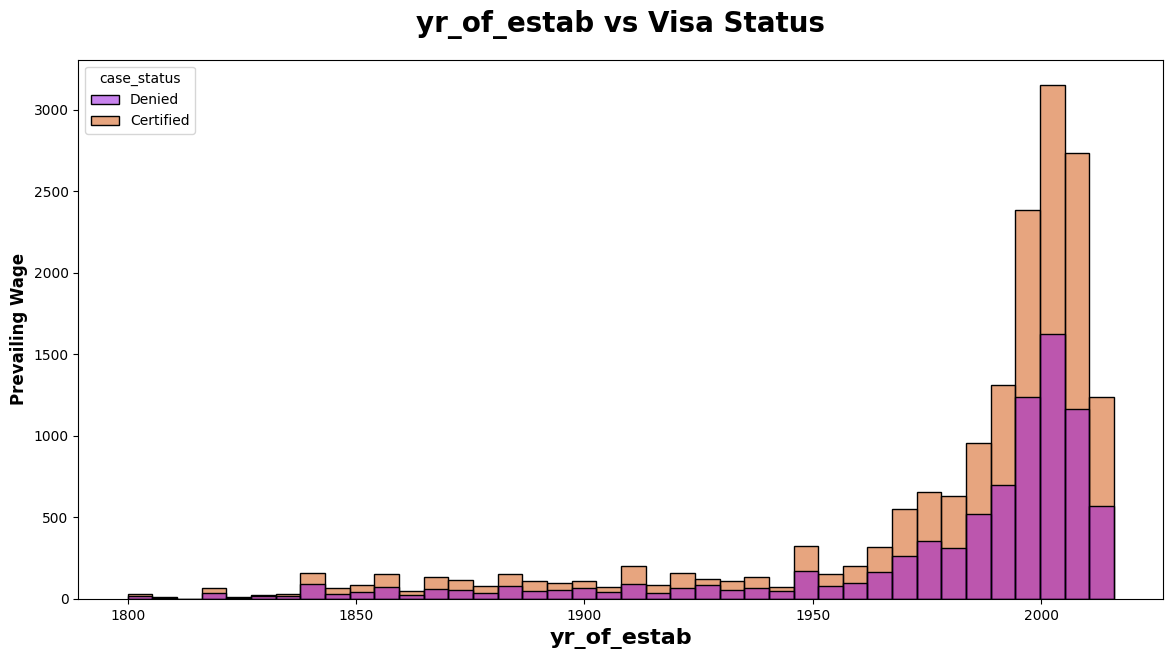

In [43]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()


* Rapor
	*	Her bir kutu 5 yıllık dilimleri temsil etmektedir.
	*	Birçok şirket 2000 yılından sonra kurulmuştur.
	*	En fazla şirket kurulumu 2000-2005 yılları arasında gerçekleşmiştir.

* Son Rapor
	*	case_id sütunu, yalnızca bir kimlik olduğu için düşürülebilir.
	*	requires_job_training sütunu, hedef değişken üzerinde fazla bir etkisi olmadığı için düşürülebilir; bu durum görselleştirme ve chi2 testiyle kanıtlanmıştır.
	*	no_of_employees ve prevailing_wage sütunlarında uç değerler (outlier) bulunmaktadır, bunlar ele alınmalıdır.
	*	continent sütununda çok az sayıda benzersiz değer vardır, bunlar “diğer” olarak birleştirilebilir.
	*	Hedef değişken case_status dengesizdir ve model kurulmadan önce bu durum ele alınmalıdır.